# Boundary value problems


## Introduction

For convenience, we start with importing some modules needed below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('../styles/mainstyle.use')

## Heated rod

Let's consider a rod made of heat conducting material. Under some simplifications, the temperature $T(x,t)$ along the rod can be determined by solving the following heat equation based on Fourier's law,

```{math}
    \frac{\partial T}{\partial t}(x,t) = \alpha \frac{\partial^2 T} {\partial x^2}(x,t) + \sigma (x,t).
```

where $\alpha$ is the thermal conductivity of the rod and $\sigma (x,t)$ is a heat source present along the rod. To close this equation, some boundary conditions at both ends of the rod need to be specified. If these boundary conditions and $\sigma$ do not depend on time, the temperature within the rod ultimately settles to the solution of the steady-state equation:

```{math}
    \frac{d^2 T}{dx^2}(x) = b(x), \; \; \; b(x) = -\sigma(x)/\alpha.
```

In the examples below, we solve this equation with some common boundary conditions.

To proceed, the equation is discretized on a numerical grid containing $nx$ grid points, and the second-order derivative is computed using the centered second-order accurate finite-difference formula derived in the previous notebook. Without loss of generality, we assume that the length of the rod is equal to $1$ so that $x\in [0,\ 1]$.

If we denote respectively by $T_i$ and $b_i$ the values of $T$ and $b$ at the grid nodes, our discretized equation reads:

```{math}
    A_{ij} T_j = b_i,
```

where $A_{ij}$ is the discretized differential operator $\frac{d^2}{dx^2}$.

### Homogeneous Dirichlet boundary conditions

In this first example, we apply homogeneous Dirichlet boundary conditions at both ends of the domain (i.e. the values are set to $0$).

```{math}
 T(0)=0, \; T(1)=0 \; \; \Leftrightarrow \; \; T_0 =0, \; T_{nx-1} = 0.
```

To implement these boundary conditions with a finite-difference scheme, we have to realize that $T_0$ and $T_{nx-1}$ are in fact not unknowns: their values are fixed and the numerical method does not need to solve for them. Our real unknowns are $T_i$ with $i \in [1,2,\dots,nx-3,nx-2]$. This implies that we need to find $nx-2$ equations relating these unknowns.

In the previous notebook we have defined $A_{ij}$ for the centered second-order accurate second-order derivative as:

```{math}
\frac{1}{\Delta x^2}
\begin{pmatrix}
2 & -5 & 4 & -1 & 0 & \dots & 0 & 0 & 0 & 0\\
1 & -2 & 1 & 0 & 0 & \dots & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & \dots & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & \dots & 0 & 0 & 0 & 0 \\
0 & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & 0 \\
0 & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & 0 \\
0 & 0 & 0 & 0  & \dots & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & \dots & 0 & -1 & 4 & -5 & 2
\end{pmatrix}.
```

Let's see how to modify this matrix to take into account the boundary conditions. First, consider the equation centered around grid node $1$. It reads:

```{math}
:label: eq:leftBndDC
    \frac{(T_0 - 2T_1+T_2)}{\Delta x^2} = b_1.
```

As $T_0=0$, it can be replaced by:

```{math}
    \frac{- 2T_1+T_2}{\Delta x^2} = b_1.
```

The next equation - around grid node 2 - reads:

```{math}
    \frac{T_1 - 2T_2 + T_3}{\Delta x^2} = b_2.
```

For this one, there is nothing to change. The next lines of the system also remain unchanged up to (and including),

```{math}
    \frac{T_{nx-4} - 2T_{nx-3} + T_{nx-2}}{\Delta x^2} = b_{nx-3}.
```

Then, taking into account $T_{nx-1}=0$, the equation around grid node $nx-2$ becomes:

```{math}
    \frac{T_{nx-3} - 2T_{nx-2}}{\Delta x^2} = b_{nx-2}.
```

If we collect these $nx-2$ equations back into a matrix system, we get:

```{math}
\frac{1}{\Delta x^2}
\begin{pmatrix}
-2 & 1 & 0 & \dots & 0 & 0 & 0 & 0\\
1 & -2 & 1 & 0 & 0 & \dots & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & \dots & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & \dots & 0 & 0 & 0 & 0 \\
0 & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & 0 \\
0 & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & 0 \\
0 & 0 & 0 & 0  & \dots & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & 0 & \dots & 0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & \dots & 0 & 0 & 0 & 1 & -2
\end{pmatrix}
\begin{pmatrix}
    T_1 \\
    T_2 \\
    \vdots \\
    T_{j-1}\\
    T_j \\
    T_{j+1}\\
    \\
    \vdots \\
    T_{nx-3} \\
    T_{nx-2}
\end{pmatrix}
=
\begin{pmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_{j-1}\\
    b_j \\
    b_{j+1}\\
    \\
    \vdots \\
    b_{nx-3} \\
    b_{nx-2}
\end{pmatrix}.
```

The above system is completely closed in terms of the *actual* unknowns $T_1,\dots,T_{nx-2}$. The matrix $\tilde A_{ij}$ on the left-hand side has dimensions $(nx-2)\times(nx-2)$. The implementation of the boundary conditions has in practice removed one line and one column from the original matrix. This is to be expected, as we now have $nx-2$ unknowns. The system can be solved by inverting $\tilde A_{ij}$ to get:

```{math}
T_i = \tilde A^{-1}_{ij} b_j.
```

Inverting matrices numerically is time consuming for large-size matrices. In a later chapter of this course we will explain how to obtain approximate inverses for large systems. Here, we will limit our attention to moderately sized matrices and rely on a `scipy` routine for matrix inversion - `inv` (available in the `linalg` submodule). The documentation for this function is available [here][1].

We now write a Python code to solve our problem with a very simple term on the right-hand side:

```{math}
 \frac{d^2 T}{dx^2}(x) = -1, \; \; \; T(0)=T(1)=0.
```

[1]: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html> "documentation for scipy.linalg.inv"

In [2]:
nx = 41                   # number of grid points
lx = 1.                   # length of interval
dx = lx / (nx-1)          # grid spacing
x = np.linspace(0, 1, nx) # coordinates of points on the grid
b = -1.0*np.ones(nx)      # right-hand side vector at the grid points
T = np.empty(nx)          # array to store the solution vector

As in the previous notebook, we rely on the `diags` routine to build our matrix.

In [3]:
from scipy.sparse import diags

To be able to re-use our code later on, we define a routine to create our matrix modified with the proper boundary conditions:

In [4]:
def d2_mat_dirichlet(nx, dx):
    """
    Constructs the centered second-order accurate second-order derivative for
    Dirichlet boundary conditions.

    Parameters
    ----------
    nx : integer
        number of grid points
    dx : float
        grid spacing

    Returns
    -------
    d2mat : numpy.ndarray
        matrix to compute the centered second-order accurate first-order deri-
        vative with Dirichlet boundary conditions on both side of the interval
    """
    # We construct a sequence of main diagonal elements,
    diagonals = [[1.], [-2.], [1.]]
    # and a sequence of positions of the diagonal entries relative to the main
    # diagonal.
    offsets = [-1, 0, 1]

    # Call to the diags routine; note that diags return a representation of the
    # array; to explicitly obtain its ndarray realisation, the call to .toarray()
    # is needed. Note how the matrix has dimensions (nx-2)*(nx-2).
    d2mat = diags(diagonals, offsets, shape=(nx-2,nx-2)).toarray()

    # Return the final array divided by the grid spacing **2.
    return d2mat / dx**2

Let's compute our matrix and check that its entries are what we expect:

In [5]:
A = d2_mat_dirichlet(nx, dx)
print(A)

[[-3200.  1600.     0. ...     0.     0.     0.]
 [ 1600. -3200.  1600. ...     0.     0.     0.]
 [    0.  1600. -3200. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... -3200.  1600.     0.]
 [    0.     0.     0. ...  1600. -3200.  1600.]
 [    0.     0.     0. ...     0.  1600. -3200.]]


We now import the `scipy.linalg.inv` function to compute the inverse of `d2mat`and act with it on the right-hand side vector $b$. This operation is performed with the help of the `numpy.dot` function that allows many sorts of vector and matrix multiplications. You should have a look at its [documentation page][2].

[2]: <https://numpy.org/doc/stable/reference/generated/numpy.dot.html> "documentation for numpy.dot"

In [6]:
from scipy.linalg import inv

In [7]:
A_inv = inv(A)

# Perform the matrix multiplication of the inverse with the right-hand side.
# We only need the values of b at the interior nodes.
T[1:-1] = np.dot(A_inv, b[1:-1])

# Manually set the boundary values in the temperature array.
T[0], T[-1] = [0, 0]

That's it! If everything went how we expected, $T$ now contains the approximate solution. We can compare it with the exact solution $T(x)=\displaystyle\frac{1}{2}x(1-x)$, which obviously satisfies the required boundary conditions.

In [8]:
T_exact = 0.5*x * (1-x) # notice how we multiply numpy arrays pointwise.

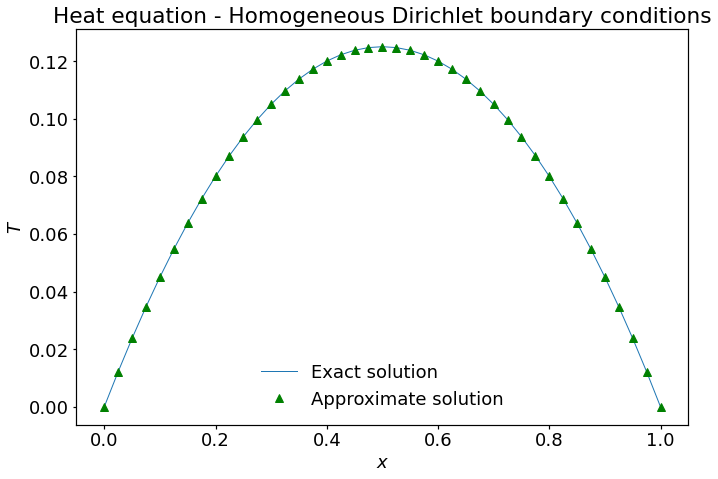

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x, T_exact, label='Exact solution')
ax.plot(x, T, '^g', label='Approximate solution')

ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Heat equation - Homogeneous Dirichlet boundary conditions')
ax.legend();

### Non-homogeneous Dirichlet boundary conditions

In the above example, we imposed homogeneous Dirichlet boundary conditions at both ends of the domain. What if we specify a non-zero value for $T$ at the left and/or right boundary node(s)? We will illustrate this for $T(0)=1$. Note that all other values or combinations of values for inhomogeneous Dirichlet boundary conditions are treated in the same way. If we look back at equation {eq}`eq:leftBndDC`, we have in full generality:

```{math}
    \frac{(T_0 - 2T_1+T_2)}{\Delta x^2} = b_1.
```

If we set $T_0=1$, this equation becomes:

```{math}
    \frac{(- 2T_1+T_2)}{\Delta x^2} = b_1 - \frac{1}{\Delta x^2}.
```

We observe that compared to our previous setup, the left-hand side has not changed. However, the value on the right-hand side (the source term) is modified. So the effect of applying a non-homogeneous Dirichlet boundary condition amounts to changing the right-hand side of our equation.

To solve the problem we can re-use everything we computed so far except that we need to modify $b_1$:

In [10]:
b[1] = b[1] - 1./dx**2
# We perform the matrix multiplication of the inverse with the rhs.
T[1:-1] = np.dot(A_inv, b[1:-1])
# We set the boundary values.
T[0], T[-1] = [1., 0.]

Let's check the numerical solution against the exact solution corresponding the modified boundary conditions: $T(x)=\displaystyle\frac12(x+2)(1-x)$.

In [11]:
T_exact = 0.5 * (x+2) * (1-x) # notice how we multiply numpy arrays pointwise.

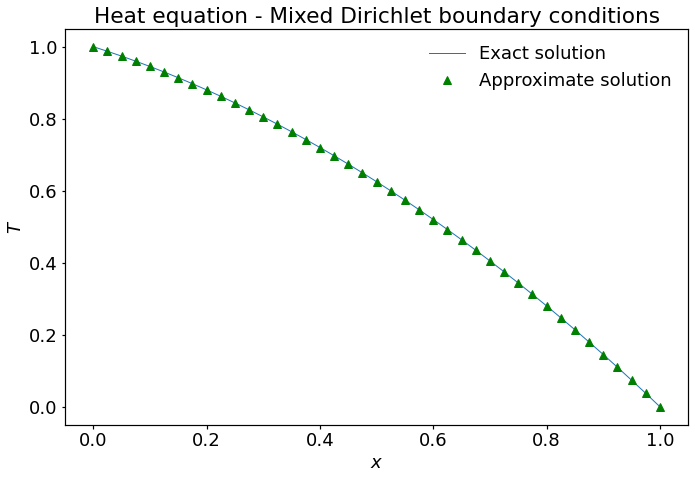

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x, T_exact, label='Exact solution')
ax.plot(x, T, '^g', label='Approximate solution')

ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Heat equation - Mixed Dirichlet boundary conditions')
ax.legend();

The solution looks just as expected!

### Neumann boundary conditions

The last type of boundary conditions we consider is the so-called Neumann boundary condition for which the derivative of the unknown function is specified at one or both ends. Physically this corresponds to specifying the heat flux entering or exiting the rod at the boundaries. Here we are going to set this flux at the left boundary node and assign a specific temperature at the right boundary node:

```{math}
 T'(0)=2, \; T(1) = 1.
```

The condition at the right boundary node is treated in the same way as in the previous section. For the left boundary node we need something different.

We have to introduce a discrete version of the condition $T'(0)=2$. As we are using a second-order accurate finite difference for the operator $\displaystyle\frac{d^2 }{dx^2}$, we also want a second-order accurate finite difference for $\displaystyle\frac{d }{dx}$. Indeed, in many problems, the loss of accuracy used for the boundary conditions would degrade the accuracy of the solution throughout the domain.

At the left boundary node we therefore use the (usual) forward second-order accurate finite difference for $T'$ to write:

```{math}
    T'_0 = \frac{-\frac32 T_0 + 2T_1 - \frac12 T_2}{\Delta x}=2.
```

If we isolate $T_0$ in the previous expression we have:

```{math}
    T_0 = \frac43 T_1 - \frac13 T_2 - \frac43 \Delta x.
```

This shows that the Neumann boundary condition can be implemented by eliminating $T_0$ from the unknown variables using the above relation. The heat equation around grid node $1$ is then modified as:

```{math}
    \frac{(T_0 - 2T_1+T_2)}{\Delta x^2} = b_1 \;\; \rightarrow \;\;
    \frac{-\frac23 T_1 + \frac 23 T_2}{\Delta x^2} = b_1 + \frac{4}{3 \Delta x}.
```

The effect of the Neumann boundary condition is two-fold: it modifies the left-hand side matrix coefficients and the right-hand side source term. Around the other grid nodes, there are no further modifications (except around grid node $nx-2$ where we impose the non-homogeneous condition $T(0)=1$).

All the necessary bits of code are now scattered at different places in the notebook. We rewrite here some of them to make the algorithm easier to follow:

In [13]:
nx = 41                   # number of grid points
lx = 1.                   # length of interval
dx = lx / (nx-1)          # grid spacing
x = np.linspace(0, 1, nx) # coordinates of points on the grid
b = -1.0*np.ones(nx)      # right-hand side vector at the grid points
T = np.empty(nx)          # array to store the solution vector

In [14]:
# We use d2_mat_dirichlet() to create the skeleton of our matrix.
A = d2_mat_dirichlet(nx, dx)

# The first line of A needs to be modified for the Neumann boundary condition.
A[0, 0:2] = np.array([-2./3., 2./3.]) / dx**2

# Computation of the inverse matrix.
A_inv = inv(A)

# The source term at grid nodes 1 and nx-2 needs to be modified.
b[1] = b[1] + 4./(3.*dx)
b[-2] = b[-2] - 1./dx**2

# Computation of the solution using numpy.dot (boundary nodes not included).
T[1:-1] = np.dot(A_inv, b[1:-1])

# We set the boundary value at the left boundary node based on the Neumann
# boundary condition.
T[0] = 4./3.*T[1] - 1./3.*T[2] - 4./3.*dx

# We set the boundary value at the right boundary node based on non-homoge-
# neous Dirichlet boundary condition.
T[-1] = 1

Let's compare the numerical solution with the exact solution $\displaystyle T_{exact}=-\frac12(x^2-4x+1)$.

In [15]:
T_exact = -0.5 * (x**2-4*x+1.)  # notice how we multiply numpy arrays pointwise.

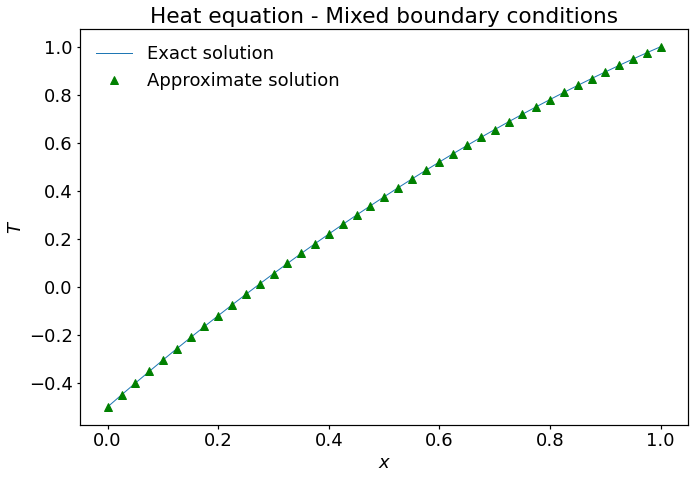

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x, T_exact, label='Exact solution')
ax.plot(x, T, '^g', label='Approximate solution')

ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Heat equation - Mixed boundary conditions')
ax.legend();

Once again, the computed solution behaves appropriately!

## Summary

In this notebook we have discussed how to use finite-difference formulas to solve boundary value problems. We have shown how to modify the original discretized differential system to take into account boundary conditions. Dirichlet boundary conditions result in the modification of the right-hand side of the equation, while Neumann boundary conditions result into the modification of both the left-hand side and the right-side of the equation. We also have briefly discussed the usage of two functions from `scipy` and `numpy` to respectively invert matrices and perform array multiplications. We advocate again the exploration of the documentation of these Python packages as they contain numerous useful tools to perform scientific computations.